In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('..')
from main import BlockAnalysis
import matplotlib.pyplot as plt

In [2]:
time, rg, bias = np.loadtxt('cv_bias.dat',unpack=True)

### Error estimation for time-correlated data series

In [3]:
'''
The variable rg contains the time-evolution of the radius
of gyration of peptide obtained from an MD simulation 

With the multi keyword you indicate that the rg array
is made from the concatenation of 2 indipendent trajectoy.
The result is that there will not be blocks covering the 
end of a trajectory and the beginning of the other. 
'''
block_rg = BlockAnalysis(rg, multi=2)

    Block size       SEM      err(SEM)
0          1.0  0.000399  3.998397e-07
1          2.0  0.000564  7.989526e-07
2          3.0  0.000690  1.197757e-06
3          4.0  0.000796  1.596297e-06
4          6.0  0.000975  2.392607e-06
5          9.0  0.001192  3.585337e-06
6         12.0  0.001376  4.776105e-06
7         18.0  0.001682  7.152358e-06
8         31.0  0.002200  1.227876e-05
9         36.0  0.002368  1.424256e-05
10        62.0  0.003092  2.440123e-05
11        93.0  0.003764  3.638431e-05
12       124.0  0.004322  4.824867e-05
13       186.0  0.005242  7.167230e-05
14       223.0  0.005710  8.548025e-05
15       279.0  0.006338  1.061405e-04
16       372.0  0.007239  1.399998e-04
17       446.0  0.007845  1.661195e-04
18       558.0  0.008691  2.058875e-04
19       669.0  0.009394  2.437010e-04
20       892.0  0.010680  3.199726e-04
21      1116.0  0.011674  3.913066e-04
22      1338.0  0.012622  4.633575e-04
23      2007.0  0.014679  6.604329e-04
24      2676.0  0.016466 

<ErrorbarContainer object of 3 artists>

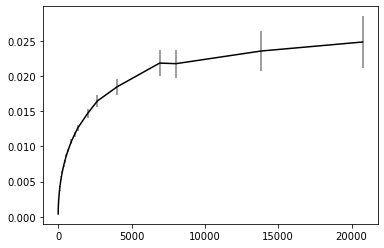

In [4]:
'''
After initializing the class we can call the statistics
from the block averaging
'''
print(pd.DataFrame(block_rg.stat, columns=['Block size', 'SEM', 'err(SEM)']))
plt.errorbar(block_rg.stat[...,0], block_rg.stat[...,1], block_rg.stat[...,2], fmt='', color='k', ecolor='0.5')

In [5]:
'''
To avoid manually picking the point in the block profile
at the beginning of the plateau (decorrelating block length,
where the SEM have the less uncertainty), we can rely on
automatic recognition of the decorrelating block length.
'''
block_rg.SEM()
print('Mean:', block_rg.av)
print('SEM:', block_rg.sem)
print('Decorrelating block length:', block_rg.bs)
#plt.errorbar(block_rg.stat[...,0], block_rg.stat[...,1], block_rg.stat[...,2], fmt='', color='k', ecolor='0.5')
#plt.scatter(block_rg.SEM()[0], block_rg.SEM()[1],zorder=10,c='tab:red')

Mean: 1.2326926261572397
SEM: 0.02184370302729555
Decorrelating block length: 6913.0


### Error estimation for the free-energy of biased time-correlated data series (MetaD)

In [3]:
'''
The dataset loaded in the 2nd cell comes from a WTMetaD run where the
rg is a biased CV. In this case we perform the block analysis on
the FES, rather than on the CV.

The class can take either the Boltzmann weights in input, or MetaD bias
and temperature and estimate the weights internally.
'''
block_fes = BlockAnalysis(rg,bias=bias,T=310,multi=2)

    Block size       SEM  err(SEM)
0          1.0  0.061755  0.000062
1          2.0  0.075896  0.000108
2          3.0  0.086114  0.000149
3          4.0  0.095254  0.000191
4          6.0  0.108876  0.000267
5          9.0  0.125496  0.000377
6         12.0  0.138756  0.000482
7         18.0  0.158948  0.000676
8         31.0  0.192162  0.001072
9         36.0  0.199403  0.001199
10        62.0  0.242649  0.001915
11        93.0  0.272682  0.002636
12       124.0  0.295648  0.003300
13       186.0  0.334371  0.004571
14       223.0  0.350930  0.005254
15       279.0  0.366460  0.006137
16       372.0  0.398862  0.007713
17       446.0  0.416188  0.008813
18       558.0  0.456740  0.010820
19       669.0  0.484008  0.012556
20       892.0  0.491630  0.014730
21      1116.0  0.518325  0.017374
22      1338.0  0.557100  0.020452
23      2007.0  0.598690  0.026936
24      2676.0  0.623798  0.032430
25      4014.0  0.688112  0.043872
26      6913.0  0.746919  0.062680
27      8028.0  0.72

Text(0, 0.5, '<SEM>(FES) [kJ/mol]')

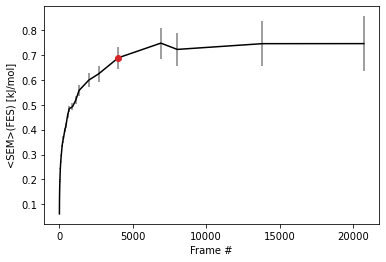

In [4]:
print(pd.DataFrame(block_fes.stat, columns=['Block size', 'SEM', 'err(SEM)']))
plt.errorbar(block_fes.stat[...,0], block_fes.stat[...,1], block_fes.stat[...,2], fmt='', color='k', ecolor='0.5')
block_fes.SEM()
plt.scatter(block_fes.bs, block_fes.sem,zorder=10,c='tab:red')
plt.xlabel('Frame #')
plt.ylabel('<SEM>(FES) [kJ/mol]')

In [5]:
'''
Beware that in this last case the SEM obtained is just an
average of the SEM over the FES. Calculating the average SEM
is only useful to get a decorrelating block size. We can indeed
use that information to obtain histograms and free-energy surfaces
with error bars specific for each point.
'''
binC, H, E = block_fes.get_pdf()

<ErrorbarContainer object of 3 artists>

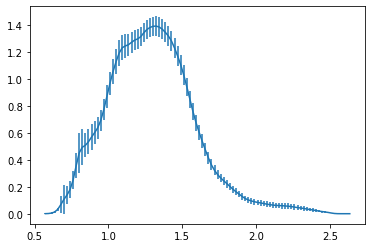

In [6]:
plt.errorbar(binC, H, E)

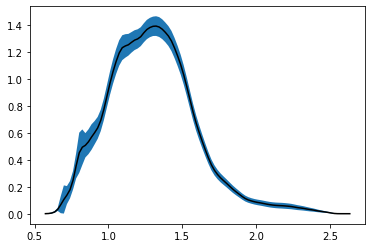

In [7]:
plt.plot(binC, H, 'k')
plt.fill_between(binC, H-E, H+E)

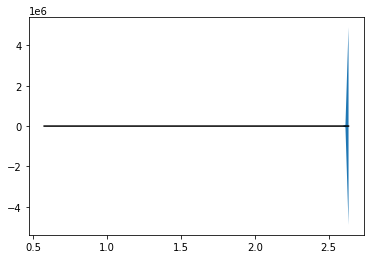

In [5]:
binC, FES, FES_err = block_fes.get_fes()
plt.plot(binC, FES, 'k')
plt.fill_between(binC, FES-FES_err, FES+FES_err)